In [6]:
import pandas as pd
from Bio import SeqIO
from seqlike import aaSeqLike
from slugify import slugify

from therapeutic_enzyme_engineering_with_generative_neural_networks.blast_utils import (
    clean_xmlfile,
    parse_seqrecs_from_blast,
    run_protein_blast,
)


### Get homologous sequences by BLAST search

### Load the reference sequence

In [2]:

refrec = aaSeqLike(SeqIO.read('../data/B5LY47.fasta', 'fasta'))
print(refrec.id, len(refrec))
print(refrec)

tr|B5LY47|B5LY47_ECOLX 278
AACIPLLLGSAPLYAQTSAVQQKLAALEKSSGGRLGVALIDTADNTQVLYRGDERFPMCSTSKVMAAAAVLKQSETQKQLLNQPVEIKPADLVNYNPIAEKHVNGTMTLAELSAAALQYSDNTAMNKLIAQLGGPGGVTAFARAIGDETFRLDRTEPTLNTAIPGDPRDTTTPRAMAQTLRQLTLGHALGETQRAQLVTWLKGNTTGAASIRAGLPTSWTVGDKTGSGGYGTTNDIAVIWPQGRAPLVLVTYFTQPQQNAESRRDVLASAARIIAEGL


#### BLASTp search against UniProtKB/SwissProt ('swissprot') database
UniProtKB/SwissProt is a semi-curated database of higher quality sequences than 'nr' (below)

In [3]:
refreckey = slugify(refrec.id, lowercase=False)

db = "swissprot"
hits = 100
blastrecs = run_protein_blast(refrec.to_seqrecord(), f"../data/{refreckey}_blast_{db}_{hits}.xml", db=db, hits=hits)
seqrecs = pd.Series([refrec] + list(parse_seqrecs_from_blast(blastrecs)))
len(seqrecs)


Found cached BLAST XML file ../data/tr-B5LY47-B5LY47-ECOLX_blast_swissprot_100.xml...


87

Found font in /opt/install/conda/envs/therapeutic_enzyme_engineering_with_generative_neural_networks/lib/python3.9/site-packages/seqlike/FreeMono.ttf


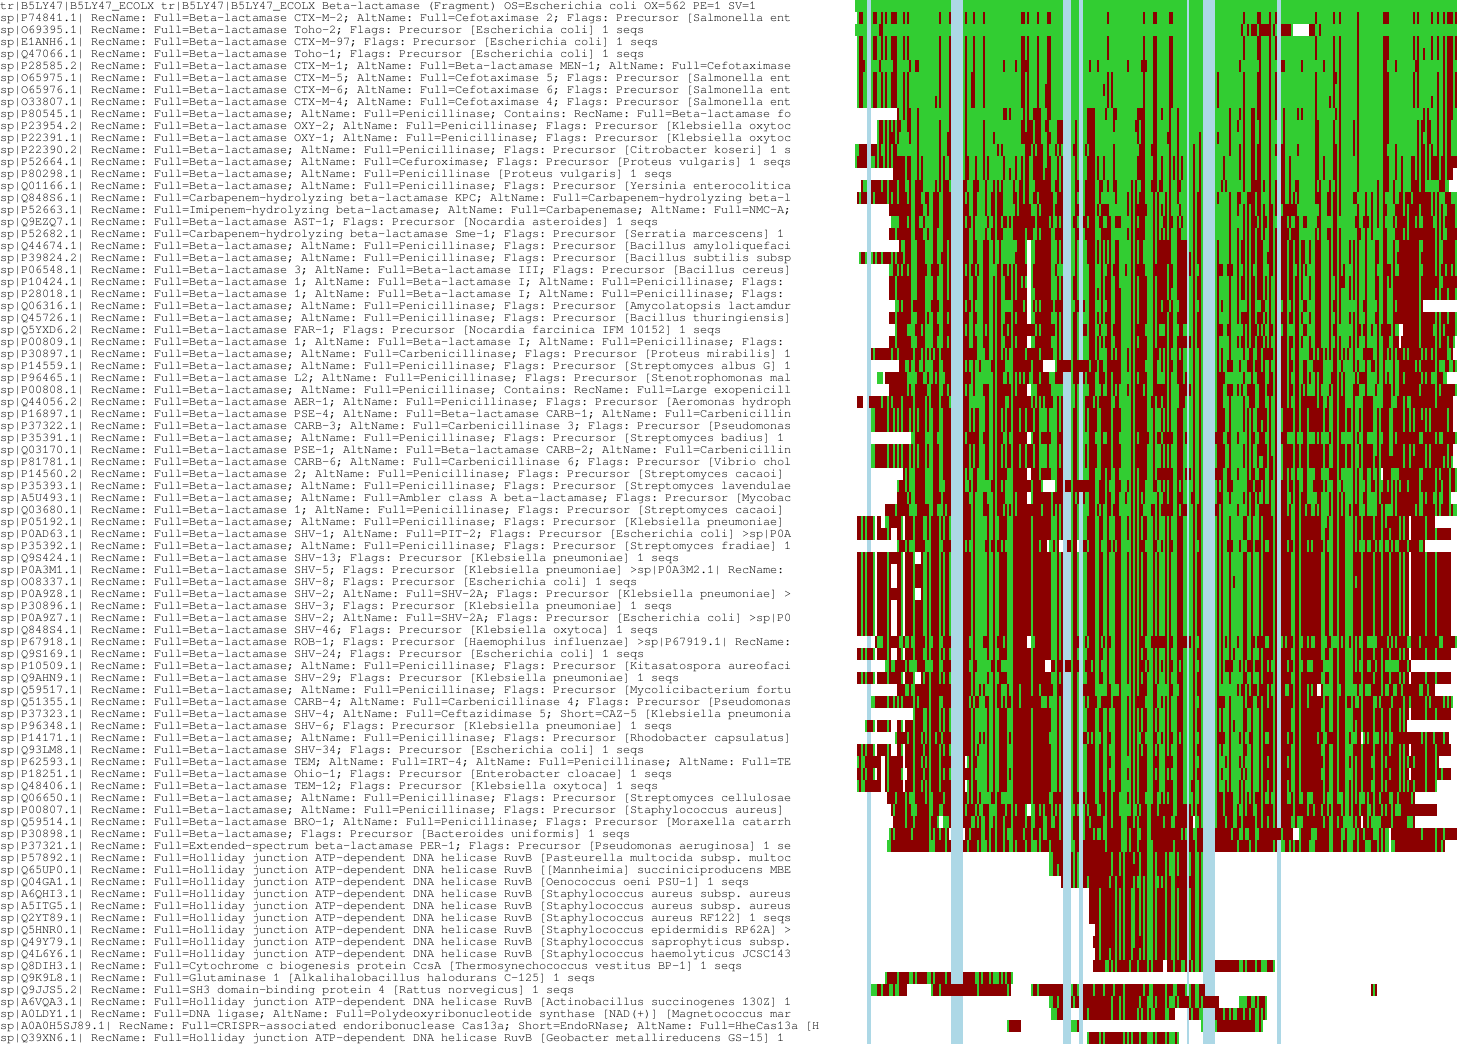

In [21]:
aligned = seqrecs.seq.align()
aligned.head(100).seq.plot(show_names=True, show_descriptions=True, show_grouping=True)

#### BLASTp search against non-redundant ('nr') database

In [22]:

db = 'nr'
hits = 5000
filename_nr = f'../data/{refreckey}_blast_{db}_{hits}.xml'
blastrecs_nr = run_protein_blast(refrec.to_seqrecord(), filename_nr, db=db, hits=hits)
clean_filename_nr = clean_xmlfile(filename_nr)
blastrecs_nr = run_protein_blast(refrec.to_seqrecord(), clean_filename_nr, db=db, hits=hits)
seqrecs_nr = pd.Series([refrec] + list(parse_seqrecs_from_blast(blastrecs_nr)))
len(seqrecs_nr)

Found cached BLAST XML file ../data/tr-B5LY47-B5LY47-ECOLX_blast_nr_5000.xml...
Found cached BLAST XML file ../data/tr-B5LY47-B5LY47-ECOLX_blast_nr_5000_clean.xml...


4989

In [23]:
seqrecs_nr.head()

0    (A, A, C, I, P, L, L, L, G, S, A, P, L, Y, A, ...
1    (A, A, C, I, P, L, L, L, G, S, A, P, L, Y, A, ...
2    (A, A, C, I, P, L, L, L, G, S, A, P, L, Y, A, ...
3    (A, A, C, I, P, L, L, L, G, S, A, P, L, Y, A, ...
4    (A, A, C, I, P, L, L, L, G, S, A, P, L, Y, A, ...
dtype: object

In [24]:
aligned_nr = seqrecs_nr.seq.align()
SeqIO.write(aligned_nr.seq.as_alignment(), f'../data/{refreckey}_blast_{db}_{hits}_aligned.fasta', 'fasta')

/opt/install/conda/envs/therapeutic_enzyme_engineering_with_generative_neural_networks/lib/python3.9/site-packages/seqlike/SeqLikeAccessor.py:82: UserWarning: It appears that the sequences here have multiple alphabets. We be replacing alphabets with the full version (AA/NT) for the full collection. 
  warnings.warn(


4989

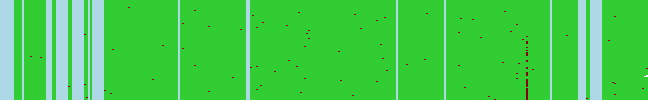

In [25]:
aligned_nr.head(100).seq.plot(boxheight=1, show_grouping=True, use_bokeh=False)

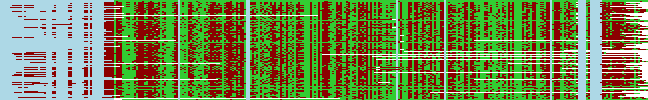

In [26]:
aligned_nr.tail(100).seq.plot(boxheight=1, show_grouping=True, use_bokeh=False)